In [21]:
using Plots, Wavelets, LinearAlgebra, FileIO, Images, Statistics
include("../src/AutocorrelationShell.jl")
using Main.AutocorrelationShell

In [36]:
# Import Image
boat = FileIO.load("../test/pictures/boat.png")
boat = Float64.(Gray.(boat))

Q, P = qfilter(wavelet(WT.db2)), pfilter(wavelet(WT.db2))
L1, L2 = 6, 6

# Decomposition
D = ac2d(boat, L1, L2, P, Q)

# Thresholding
T = acthreshold(D, "hard", exp(-6))
T2 = acthreshold(D, "soft", exp(-6))
"Supress Output"

"Supress Output"

In [63]:
options = (
    yflip=true,
    axis=nothing,
    colorbar_entry=false,
    aspect_ratio=:equal,
    showaxis=false
)
h₁ = heatmap(D[:,:,1,1]; options...)
h₂ = heatmap(D[:,:,1,2]; options..., clim=(0, 0.2))
h₃ = heatmap(D[:,:,1,3]; options..., clim=(0, 0.2))
h₄ = heatmap(D[:,:,2,1]; options..., clim=(0, 0.1))
h₅ = heatmap(D[:,:,2,2]; options..., clim=(0, 0.1))
h₆ = heatmap(D[:,:,2,3]; options..., clim=(0, 0.1))
h₇ = heatmap(D[:,:,3,1]; options..., clim=(0, 0.1))
h₈ = heatmap(D[:,:,3,2]; options..., clim=(0, 0.1))
h₉ = heatmap(D[:,:,3,3]; options..., clim=(0, 0.1))
plot(
    h₁,h₂,h₃,h₄,h₅,h₆,h₇,h₈,h₉,
    layout=(3,3),
    size=(2050,2050)
)

In [62]:
png("decomposition matrix")

In [64]:
Tmin = minimum(log.(abs.(T) .+ 1e-7))
Tmax = maximum(log.(abs.(T)))
collect(Tmin:0.03:Tmax)

605-element Array{Float64,1}:
 -16.11809565095832  
 -16.08809565095832  
 -16.05809565095832  
 -16.02809565095832  
 -15.998095650958321 
 -15.96809565095832  
 -15.93809565095832  
 -15.90809565095832  
 -15.87809565095832  
 -15.84809565095832  
 -15.81809565095832  
 -15.78809565095832  
 -15.758095650958321 
   ⋮                 
   1.6719043490416787
   1.7019043490416799
   1.7319043490416774
   1.7619043490416786
   1.7919043490416797
   1.8219043490416773
   1.8519043490416784
   1.8819043490416796
   1.9119043490416772
   1.9419043490416783
   1.9719043490416794
   2.0019043490416806

In [68]:
using PyPlot

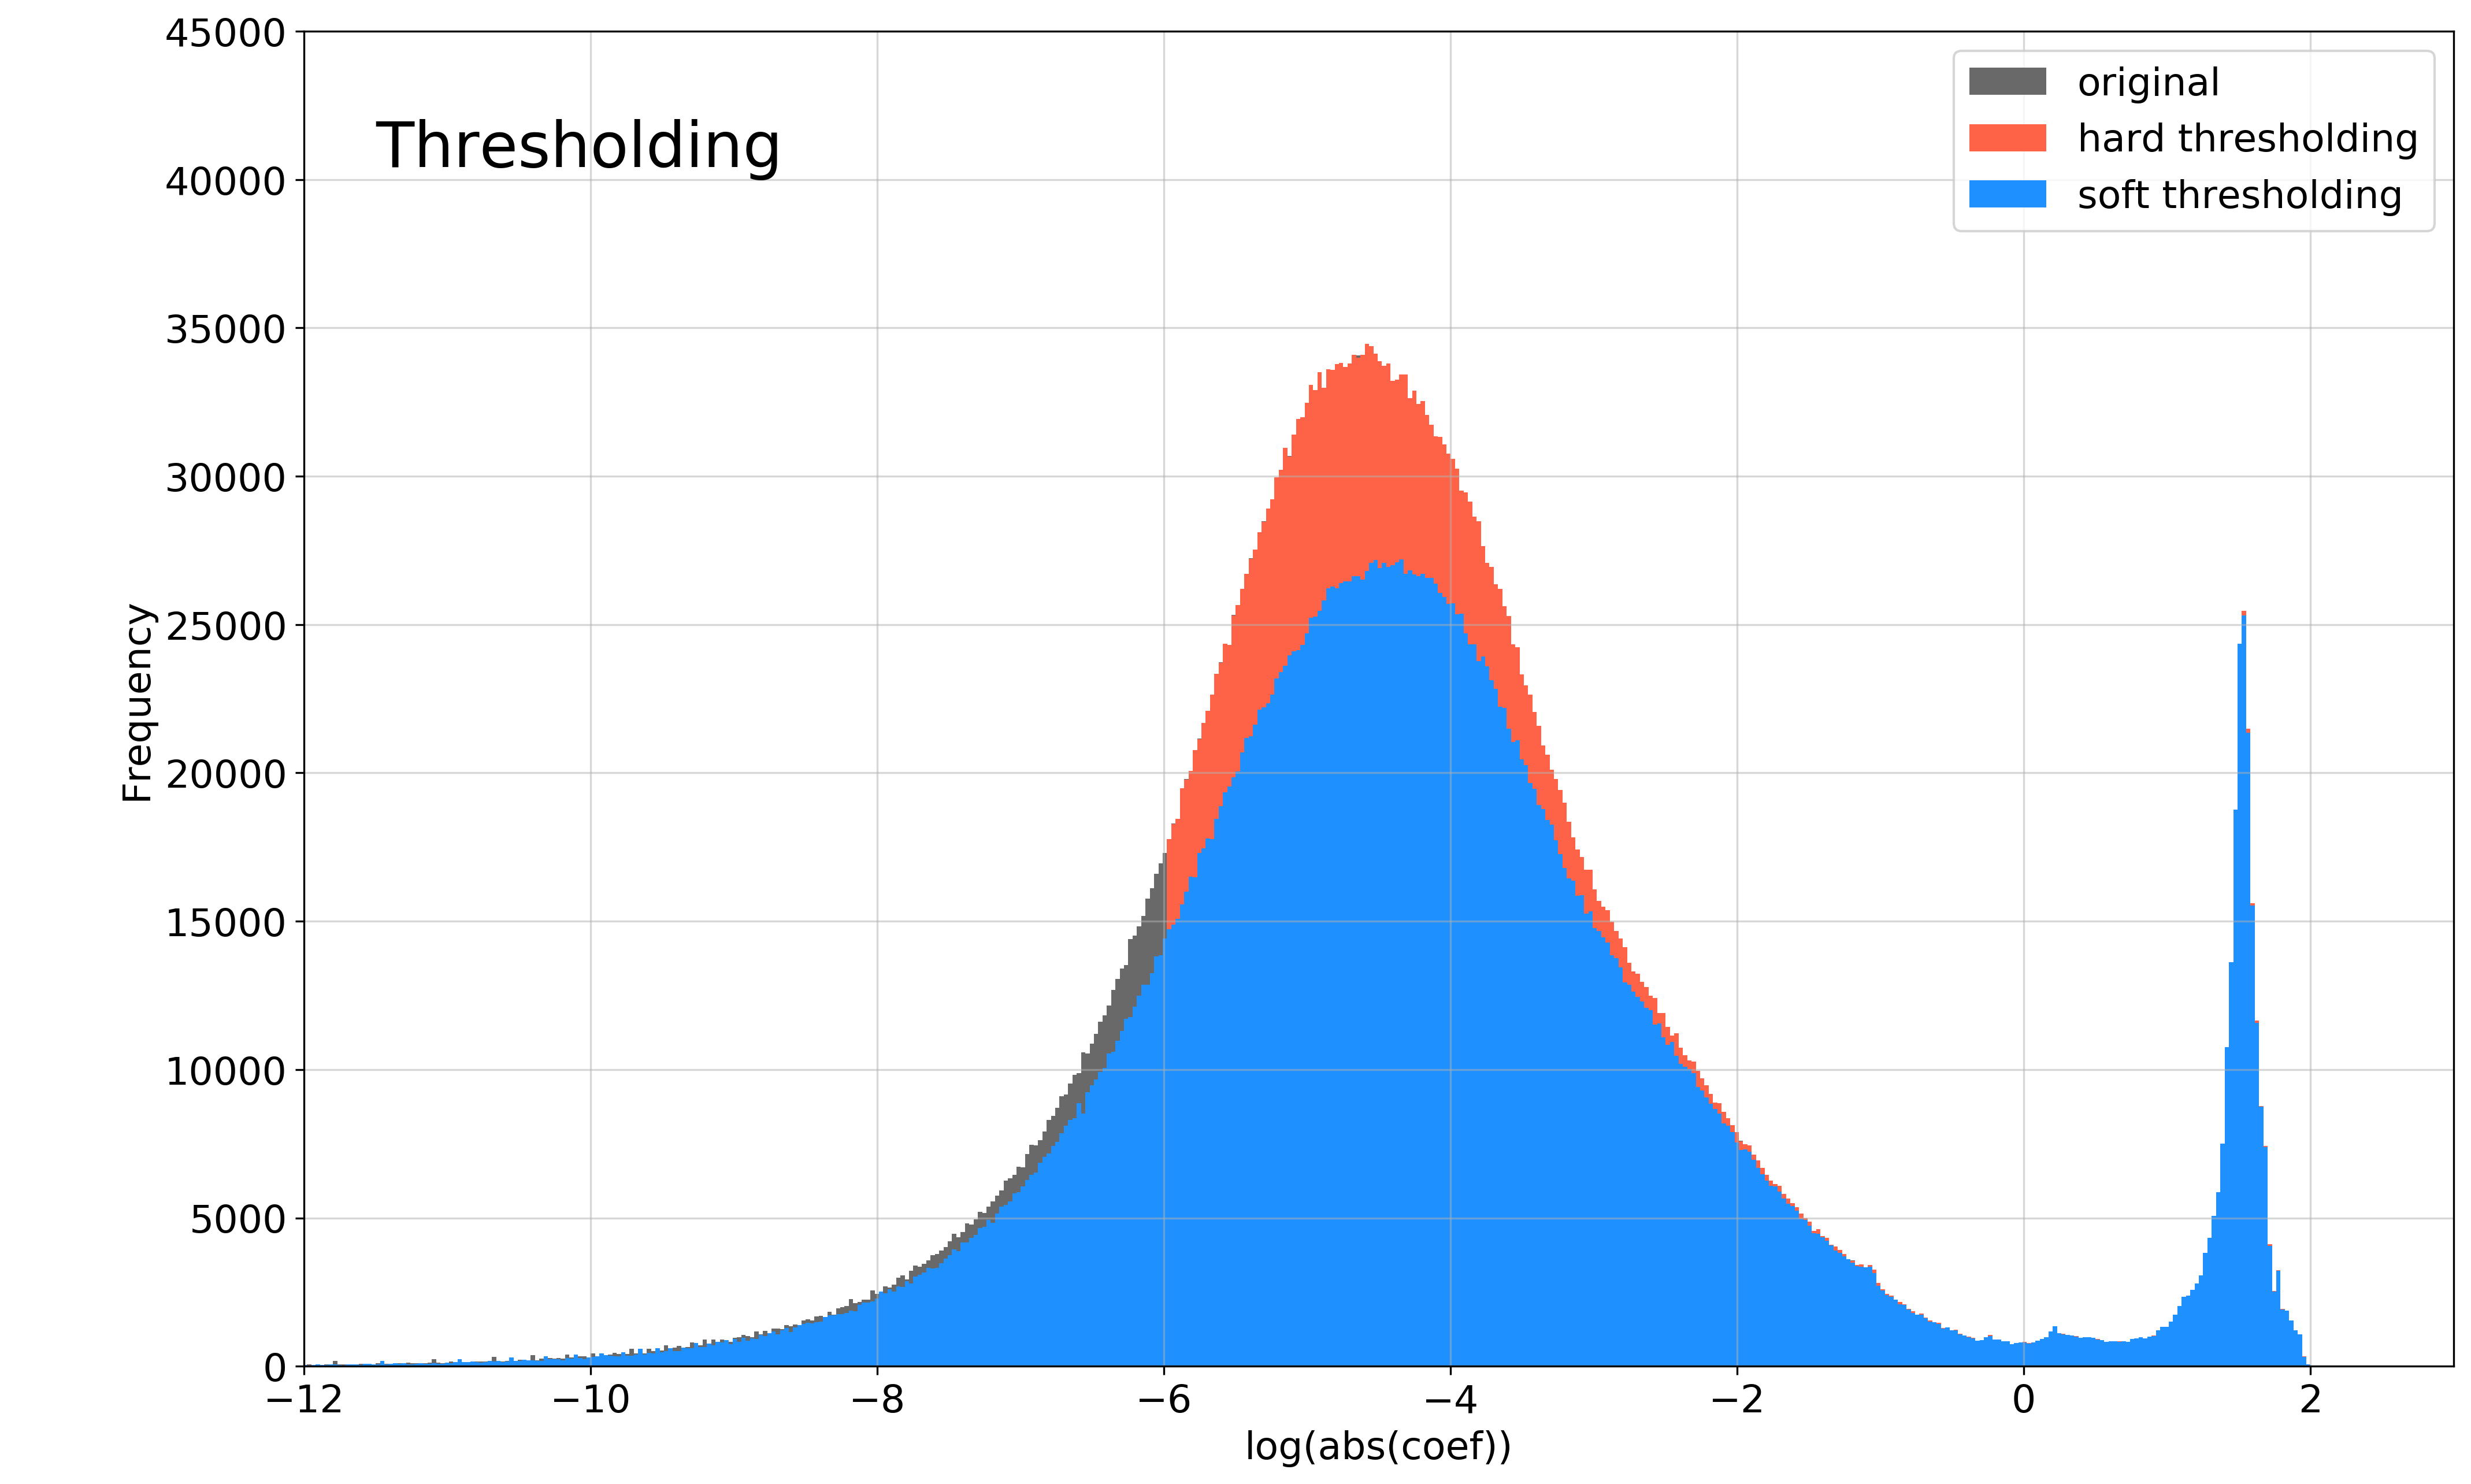

PyObject <matplotlib.legend.Legend object at 0x19e775590>

In [73]:
fig = plt.figure(figsize=(16,10), dpi=300)
ax = fig.add_subplot(111)
ax.hist(
    log.(abs.(D[:])), 
    bins=collect(Tmin:0.03:Tmax),
    label="original",
    color="dimgrey"
)
ax.hist(
    log.(abs.(T[:]) .+ 1e-7), 
    bins=collect(Tmin:0.03:Tmax), 
    color="tomato",
    label="hard thresholding"
)
ax.hist(
    log.(abs.(T2[:]) .+ 1e-7), 
    bins=collect(Tmin:0.03:Tmax), 
    color="dodgerblue",
    label="soft thresholding"
)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("log(abs(coef))", fontsize=16)
ax.annotate(
    "Thresholding", 
    xy=(-11.5,40000),
    xycoords="data",
    fontsize=26,
    horizontalalignment="left", verticalalignment="bottom"
)
ax.annotate(
    "Hard v.s. Soft",
    xy=(-11.5,38000),
    xycoords="data",
    fontsize=16,
    horizontalalignment="left", verticalalignment="bottom"
)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylim(0, 45000)
ax.set_xlim([-12,3])
ax.grid(linestyle="-", alpha=0.5)
ax.legend(prop=Dict("size"=> 16))

In [ ]:
png("thresholding")

In [ ]:
using StatsPlots

In [ ]:
histogram(
    log.(abs.(D[:])), 
    labels = "Original",
    color = :black,
)
histogram!(
    log.(abs.(T[:]) .+ 1e-6),
    labels = "Hard",
    linewidth = 1.5,
    linealpha=0.7,
    color = :red,
)
histogram!(
    log.(abs.(T2[:]) .+ 1e-6), 
    labels = "Soft",
    color = :blue2,
)

In [ ]:
png("coef_hist")

In [ ]:
plot_heatmap(x) = heatmap(
    x,
    yflip=true,
    axis=nothing,
    colorbar_entry=false,
    aspect_ratio=:equal,
    showaxis=false,
    clim=[0,1]
)

In [ ]:
histogram(
    log.(abs.(T[:])), 
    bins = :scott,
    labels = false,
    xlim = [-15, 2]
)
annotate!(
    -14, 5.5*10^4, 
    text("Hard Thresholding", :left, 12)
)
annotate!(
    -14, 5.2*10^4, 
    text("Image: Lenna", :left, 10)
)

In [ ]:

histogram(
    log.(abs.(T2[:])), 
    bins = :scott,
    labels = false,
    xlim = [-15, 2]
)
annotate!(
    -14, 5.5*10^4, 
    text("Soft Thresholding", :left, 12)
)
annotate!(
    -14, 5.2*10^4, 
    text("Image: Lenna", :left, 10)
)

In [ ]:
png("coef_soft_hist")

In [ ]:
R = iac2d(T)
plot_heatmap(R)